In [904]:
# Need to prepare the news headlines in the same way as the training data
# Load the news headlines
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

stock = "QQQ"

        
def preprocess(input_series):
    result_series = input_series.copy()
    
    # Apply preprocessing steps to the series
    result_series = result_series.str.lower()  # Convert to lowercase
    result_series = result_series.str.replace("[^\w\s]", "", regex=True)  # Remove punctuation marks
    result_series = result_series.str.replace("\d+", "", regex=True)  # Remove numbers
    result_series = result_series.str.replace("\s+", " ", regex=True)  # Replace newlines and multiple spaces with a single space

    return result_series

In [905]:
data = pd.read_csv('raw_analyst_ratings.csv')
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [906]:
# Get the 50 most stock with the most amount of datee
data['stock'].value_counts().head(50)

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
QCOM    2941
JNJ     2928
DAL     2926
BABA    2858
KO      2797
AA      2739
EWU     2702
ORCL    2701
FDX     2629
HD      2612
WFC     2612
BBRY    2580
BMY     2528
JCP     2516
LLY     2417
AGN     2408
CMG     2370
EWJ     2362
CAT     2322
GPRO    2303
TWX     2279
CHK     2246
GLD     2236
P       2234
LMT     2228
MCD     2228
FSLR    2222
NOK     2217
EA      2169
FCX     2162
MA      2152
PEP     2141
GPS     2127
XLF     2114
GRPN    2093
TM      2055
EWP     2027
HAL     2017
LOW     2013
ADBE    1999
Name: count, dtype: int64

In [907]:
# Im going to use the MS stock as it has a lot of dates
news_data = data[data['stock'] == stock]

news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
1049426,1054626,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,QQQ
1049427,1054627,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,QQQ
1049428,1054628,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09 12:14:26-04:00,QQQ
1049429,1054629,Cramer: NASDAQ Rebound Makes Sense As It Bette...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09 10:31:06-04:00,QQQ
1049430,1054630,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09 10:08:00-04:00,QQQ


In [908]:
news_data.shape

(3106, 6)

In [909]:
# Get the date range
print(news_data['date'].min())
print(news_data['date'].max())

2011-03-16 00:00:00
2020-06-10 12:12:25-04:00


In [910]:
# Get the top ten stocks with the most amount of unique dates
top_stocks = data.groupby('stock')['date'].nunique().sort_values(ascending=False).head(10)
print(top_stocks)

stock
MRK     1615
KO      1407
MS      1392
JNJ     1378
DAL     1357
GILD    1335
VZ      1315
M       1298
BMY     1288
GLD     1224
Name: date, dtype: int64


<Axes: title={'center': 'Top 10 Stocks with the Most Amount of Unique Dates'}, xlabel='stock'>

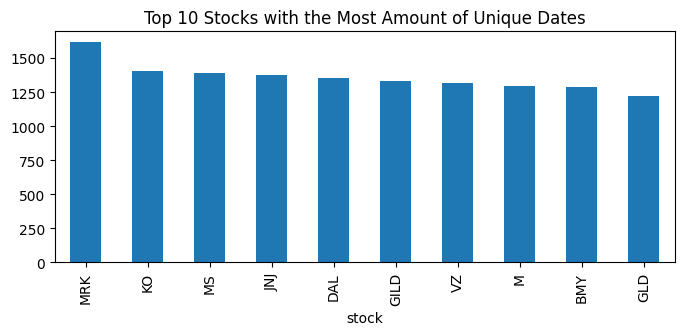

In [911]:
# graph the top ten stocks with the most amount of unique dates
top_stocks.plot(kind='bar', title='Top 10 Stocks with the Most Amount of Unique Dates', figsize=(8, 3))


In [912]:
news_data

,Unnamed: 0,headline,url,publisher,date,stock
1049426,1054626,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,QQQ
1049427,1054627,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,QQQ
1049428,1054628,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09 12:14:26-04:00,QQQ
1049429,1054629,Cramer: NASDAQ Rebound Makes Sense As It Bette...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09 10:31:06-04:00,QQQ
1049430,1054630,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09 10:08:00-04:00,QQQ
...,...,...,...,...,...,...
1052527,1057738,"Stocks Grind Higher On Wednesday (SPY, QQQQ, G...",https://www.benzinga.com/etfs/bond-etfs/11/03/...,Scott Rubin,2011-03-23 00:00:00,QQQ
1052528,1057739,"Doug Kass Shorting Broader ETFs (IWM, SPY, QQQ)",https://www.benzinga.com/trading-ideas/short-i...,Roger Nachman,2011-03-23 00:00:00,QQQ
1052529,1057740,"Reminder: QQQQ Changes To QQQ Today (QQQQ, QQQ)",https://www.benzinga.com/etfs/new-etfs/11/03/9...,Benzinga Staff,2011-03-23 00:00:00,QQQ
1052530,1057741,PowerShares QQQ Ticker to Change from ‘QQQQ' t...,https://www.benzinga.com/etfs/sector-etfs/11/0...,Benzinga Staff,2011-03-23 00:00:00,QQQ


In [913]:
# Apply the preprocessing function to the news headlines
news_data['headline'] = preprocess(news_data['headline'])

In [914]:
news_data

,Unnamed: 0,headline,url,publisher,date,stock
1049426,1054626,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,QQQ
1049427,1054627,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,QQQ
1049428,1054628,afternoon market stats in minutes,https://www.benzinga.com/markets/20/06/1621366...,Benzinga Insights,2020-06-09 12:14:26-04:00,QQQ
1049429,1054629,cramer nasdaq rebound makes sense as it better...,https://www.benzinga.com/markets/20/06/1621185...,Jayson Derrick,2020-06-09 10:31:06-04:00,QQQ
1049430,1054630,morning market stats in minutes,https://www.benzinga.com/markets/20/06/1621207...,Benzinga Insights,2020-06-09 10:08:00-04:00,QQQ
...,...,...,...,...,...,...
1052527,1057738,stocks grind higher on wednesday spy qqqq gld ...,https://www.benzinga.com/etfs/bond-etfs/11/03/...,Scott Rubin,2011-03-23 00:00:00,QQQ
1052528,1057739,doug kass shorting broader etfs iwm spy qqq,https://www.benzinga.com/trading-ideas/short-i...,Roger Nachman,2011-03-23 00:00:00,QQQ
1052529,1057740,reminder qqqq changes to qqq today qqqq qqq,https://www.benzinga.com/etfs/new-etfs/11/03/9...,Benzinga Staff,2011-03-23 00:00:00,QQQ
1052530,1057741,powershares qqq ticker to change from qqqq to qqq,https://www.benzinga.com/etfs/sector-etfs/11/0...,Benzinga Staff,2011-03-23 00:00:00,QQQ


In [915]:
# Load the historical financial data
stock_data = pd.read_csv(f'stock_data/{stock}_historical_data.csv')

stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-03-16,55.029999,55.340000,53.770000,54.150002,48.142254,176507700
1,2011-03-17,55.009998,55.240002,54.130001,54.650002,48.586777,94434500
2,2011-03-18,55.220001,55.220001,54.410000,54.450001,48.477268,94887200
3,2011-03-21,55.279999,55.779999,54.500000,55.500000,49.412094,57423000
4,2011-03-22,55.580002,55.610001,55.279999,55.400002,49.323044,36162100


In [916]:
import os
import pickle
import torch
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from rich.progress import track
from tqdm import tqdm

merged_df = None

nltk.download('vader_lexicon')

class FinbertClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, model_path="ProsusAI/finbert"):
        self.tokenizer = AutoTokenizer.from_pretrained(model_path)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_path)

    def predict(self, texts):
        inputs = self.tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
        with torch.no_grad():
            outputs = self.model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        return predictions.numpy()

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# List all of the models in the models directory
available_models = os.listdir('models')

data_directory = 'news_data_with_sentiment'
file_path = os.path.join(data_directory, f'{stock}_data_with_sentiment.csv')

if os.path.exists(file_path):
    # If the file exists, load the DataFrame
    news_data = pd.read_csv(file_path)
else:
    # If the file doesn't exist, run through the models to create it
    for model_name in tqdm(available_models, desc="Processing models..."):
        # Load the model
        model = pickle.load(open(f'models/{model_name}', 'rb'))
        # Predict the sentiment 
        model_key = f'Sentiment_{model_name.split("_pipeline")[0]}'
        headlines_list = news_data['headline'].tolist()  # Ensure the input is a list of strings

        if isinstance(model, FinbertClassifier) or isinstance(model, Pipeline):
            # Use predict method for FinbertClassifier or Pipeline
            news_data[model_key] = model.predict(headlines_list)
        else:
            # Other model types (if any) can be handled here
            news_data[model_key] = model.predict(headlines_list)

    news_data['Sentiment_VADER'] = [(vader.polarity_scores(headline)['compound'] + 1) / 2 for headline in news_data['headline']]
    
    
    news_data.to_csv(file_path, index=False)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/calnan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Processing models...:  11%|█         | 1/9 [00:00<00:01,  5.69it/s]

: 

In [ ]:
news_data

,Unnamed: 0,headline,url,publisher,date,stock,Sentiment_DecisionTreeClassifier,Sentiment_finbert,Sentiment_LogisticRegression,Sentiment_KNeighborsClassifier,Sentiment_MultinomialNB,Sentiment_SGDClassifier,Sentiment_GradientBoostingClassifier,Sentiment_XGBClassifier,Sentiment_RandomForestClassifier,Sentiment_VADER
0,850715,shares of several healthcare companies are tra...,https://www.benzinga.com/wiim/20/06/16233278/s...,Benzinga Newsdesk,2020-06-11 10:22:31-04:00,MRK,0,1,1,1,1,0,0,1,1,1
1,850716,johnson johnson to start coronavirus vaccine h...,https://www.benzinga.com/general/biotech/20/06...,Neer Varshney,2020-06-11 00:16:21-04:00,MRK,1,2,1,0,1,1,1,1,1,1
2,850717,the daily biotech pulse keytruda setback for m...,https://www.benzinga.com/general/biotech/20/06...,Shanthi Rexaline,2020-06-10 07:30:59-04:00,MRK,1,1,0,1,0,0,1,1,1,1
3,850718,merck announces that the phase keynote trial e...,https://www.benzinga.com/news/20/06/16216257/m...,Benzinga Newsdesk,2020-06-09 16:13:02-04:00,MRK,1,0,1,1,1,1,1,1,1,1
4,850719,the week ahead in biotech viela fda decision h...,https://www.benzinga.com/general/biotech/20/06...,Shanthi Rexaline,2020-06-07 13:43:52-04:00,MRK,1,2,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,854067,fitch downgrades merck outlook stable,https://www.benzinga.com/markets/analyst-resea...,Benzinga Staff,2009-11-04 00:00:00,MRK,1,1,0,1,0,0,1,1,1,1
3329,854068,sanofiaventis sny completes acquisition of merial,https://www.benzinga.com/benzingastaff1/2009/9...,BenzingaStaff1,2009-09-18 00:00:00,MRK,1,2,1,1,1,1,1,1,1,1
3330,854071,paragonreportcom complimentary market update o...,https://www.benzinga.com/09/08/1612/paragonrep...,Benzinga Staff,2009-08-10 00:00:00,MRK,1,2,1,1,1,1,1,1,1,1
3331,854072,paragonreportcom complimentary market update o...,https://www.benzinga.com/09/08/675/paragonrepo...,Benzinga Staff,2009-08-07 00:00:00,MRK,1,2,1,1,1,1,1,1,1,1


In [ ]:
# Remove the pipeline suffix from the model names and add a Sentiment_ prefix
available_models = [f"Sentiment_{model_name.split('_pipeline')[0]}" for model_name in available_models]

In [ ]:
news_data['Sentiment_Random'] = np.random.randint(2, size=len(news_data))

# # Add it to the available models list
available_models.append('Sentiment_Random')

In [ ]:
available_models

['Sentiment_DecisionTreeClassifier',
 'Sentiment_finbert',
 'Sentiment_LogisticRegression',
 'Sentiment_KNeighborsClassifier',
 'Sentiment_MultinomialNB',
 'Sentiment_SGDClassifier',
 'Sentiment_GradientBoostingClassifier',
 'Sentiment_XGBClassifier',
 'Sentiment_RandomForestClassifier',
 'Sentiment_Random']

In [ ]:
# Initialize a dictionary to hold the counts
model_counts_dict = {}

for model in available_models:
    # Store the value counts in the dictionary
    model_counts_dict[model] = news_data[model].value_counts()

# Convert the dictionary to a DataFrame
model_sentiment_counts = pd.DataFrame(model_counts_dict)

# Transpose the DataFrame to have models as rows and sentiment values as columns
model_sentiment_counts = model_sentiment_counts.T

# Fill NaN values with 0, in case some sentiment values are missing in some models
model_sentiment_counts = model_sentiment_counts.fillna(0)

# Display the DataFrame
model_sentiment_counts


,0,1,2
Sentiment_DecisionTreeClassifier,121.0,3212.0,0.0
Sentiment_finbert,999.0,518.0,1816.0
Sentiment_LogisticRegression,427.0,2906.0,0.0
Sentiment_KNeighborsClassifier,224.0,3109.0,0.0
Sentiment_MultinomialNB,757.0,2576.0,0.0
Sentiment_SGDClassifier,609.0,2724.0,0.0
Sentiment_GradientBoostingClassifier,141.0,3192.0,0.0
Sentiment_XGBClassifier,201.0,3132.0,0.0
Sentiment_RandomForestClassifier,202.0,3131.0,0.0
Sentiment_Random,1624.0,1709.0,0.0


In [ ]:
news_data['date'] = news_data['date'].str.split(' ').str[0]

news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,Sentiment_DecisionTreeClassifier,Sentiment_finbert,Sentiment_LogisticRegression,Sentiment_KNeighborsClassifier,Sentiment_MultinomialNB,Sentiment_SGDClassifier,Sentiment_GradientBoostingClassifier,Sentiment_XGBClassifier,Sentiment_RandomForestClassifier,Sentiment_VADER,Sentiment_Random
0,850715,shares of several healthcare companies are tra...,https://www.benzinga.com/wiim/20/06/16233278/s...,Benzinga Newsdesk,2020-06-11,MRK,0,1,1,1,1,0,0,1,1,1,0
1,850716,johnson johnson to start coronavirus vaccine h...,https://www.benzinga.com/general/biotech/20/06...,Neer Varshney,2020-06-11,MRK,1,2,1,0,1,1,1,1,1,1,1
2,850717,the daily biotech pulse keytruda setback for m...,https://www.benzinga.com/general/biotech/20/06...,Shanthi Rexaline,2020-06-10,MRK,1,1,0,1,0,0,1,1,1,1,0
3,850718,merck announces that the phase keynote trial e...,https://www.benzinga.com/news/20/06/16216257/m...,Benzinga Newsdesk,2020-06-09,MRK,1,0,1,1,1,1,1,1,1,1,0
4,850719,the week ahead in biotech viela fda decision h...,https://www.benzinga.com/general/biotech/20/06...,Shanthi Rexaline,2020-06-07,MRK,1,2,1,1,1,1,1,1,1,1,0


In [ ]:
# Convert the 'date' column to datetime and extract the date part
news_data['date'] = pd.to_datetime(news_data['date']).dt.date

daily_sentiments = {}

# Aggregate the sentiment values by date, i.e. if there are multiple headlines for a date, take the most common sentiment value
for model in available_models:
    daily_sentiments[model] = news_data.groupby('date')[model].min()#apply(lambda x: x.mode().iloc[0])

daily_sentiments

{'Sentiment_DecisionTreeClassifier': date
 2009-07-27    1
 2009-08-07    1
 2009-08-10    1
 2009-09-18    1
 2009-11-04    1
              ..
 2020-06-05    1
 2020-06-07    1
 2020-06-09    1
 2020-06-10    1
 2020-06-11    0
 Name: Sentiment_DecisionTreeClassifier, Length: 1611, dtype: int64,
 'Sentiment_finbert': date
 2009-07-27    2
 2009-08-07    2
 2009-08-10    2
 2009-09-18    2
 2009-11-04    1
              ..
 2020-06-05    0
 2020-06-07    2
 2020-06-09    0
 2020-06-10    1
 2020-06-11    1
 Name: Sentiment_finbert, Length: 1611, dtype: int64,
 'Sentiment_LogisticRegression': date
 2009-07-27    1
 2009-08-07    1
 2009-08-10    1
 2009-09-18    1
 2009-11-04    0
              ..
 2020-06-05    1
 2020-06-07    1
 2020-06-09    1
 2020-06-10    0
 2020-06-11    1
 Name: Sentiment_LogisticRegression, Length: 1611, dtype: int64,
 'Sentiment_KNeighborsClassifier': date
 2009-07-27    1
 2009-08-07    1
 2009-08-10    1
 2009-09-18    1
 2009-11-04    1
              ..
 2

In [ ]:
# Merge with stock data

# Ensure the stock data's 'Date' column is in the correct format
# stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Remame the date column from average_daily_sentiment to 'Date'
# average_daily_sentiment = average_daily_sentiment.rename(columns={'date': 'Date'})

for model in available_models:
    # Rename the columns to 'Date' and 'Sentiment'
    daily_sentiments[model] = daily_sentiments[model].reset_index().rename(columns={'date': 'Date', model: 'Sentiment'})

# average_daily_sentiment

In [ ]:
for model in available_models:
    daily_sentiments[model]['Date'] = pd.to_datetime(daily_sentiments[model]['Date'])

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

all_sentiments = pd.DataFrame()

for model in available_models:
    sentiment_data = daily_sentiments[model].rename(columns={'Sentiment': f'Sentiment_{model.split("_")[1]}'})
    
    if all_sentiments.empty:
        all_sentiments = sentiment_data
    else:
        # Inspect the head of dataframes before merging

        all_sentiments = all_sentiments.merge(sentiment_data, on='Date', how='outer')


merged_df = stock_data.merge(all_sentiments, on='Date', how='left')

# Save the data
merged_df.to_csv(f'stock_data_wtih_features/{stock}_data_with_sentiment.csv', index=False)


In [ ]:
# import pandas as pd

# # Assuming merged_df is your final merged DataFrame

# # Add a another column to the data called 'Sentiment_Random' and fill it with random values either 0 or 1
merged_df['Sentiment_Random'] = np.random.randint(2, size=len(merged_df))

# # Add it to the available models list
available_models.append('Sentiment_Random')

# # Initialize a DataFrame to store correlations
# correlations = pd.DataFrame(columns=['Model', 'Correlation'])

# # Calculate and store correlations for each model
# for model in available_models:
#     correlation = merged_df[['Close', model]].corr().iloc[0, 1]
#     new_row = pd.DataFrame({'Model': [model], 'Correlation': [correlation]})
#     correlations = pd.concat([correlations, new_row], ignore_index=True)

# # Sort the DataFrame by correlation in descending order
# correlations_sorted = correlations.sort_values(by='Correlation', ascending=False)

# # Display the sorted correlations
# correlations_sorted


In [ ]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment_DecisionTreeClassifier,Sentiment_finbert,Sentiment_LogisticRegression,Sentiment_KNeighborsClassifier,Sentiment_MultinomialNB,Sentiment_SGDClassifier,Sentiment_GradientBoostingClassifier,Sentiment_XGBClassifier,Sentiment_RandomForestClassifier,Sentiment_Random
0,2009-07-27,29.694656,29.751907,29.026718,29.360687,17.994921,21026758,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,2009-07-28,29.303434,29.494274,28.406488,28.645039,17.556303,23627265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2009-07-29,28.635496,28.759542,28.158398,28.501907,17.468576,16696736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2009-07-30,28.826336,29.551527,28.511450,28.568703,17.509518,24300290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2009-07-31,28.816793,29.179390,28.540075,28.635496,17.550451,16269362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2020-06-04,77.547707,78.396950,77.137405,77.814888,69.658882,9292930,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2734,2020-06-05,78.349236,79.322517,77.757637,78.492363,70.265343,10413347,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2735,2020-06-08,77.433205,79.389313,77.433205,79.103050,70.812035,9956838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2736,2020-06-09,79.379768,79.685112,78.358780,78.492363,70.265343,8846168,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


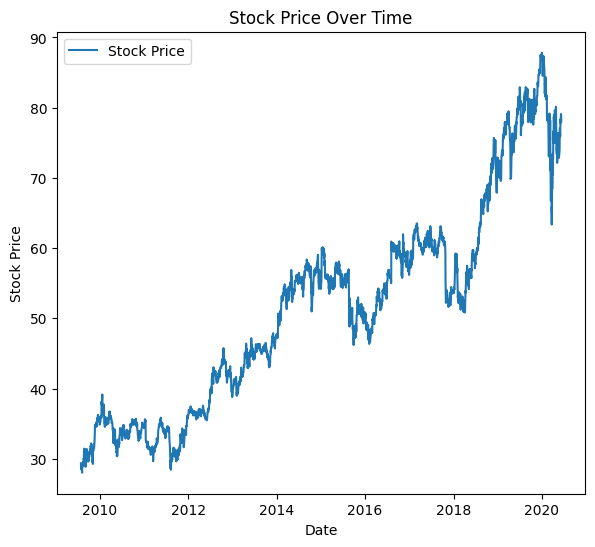

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(merged_df['Date'], merged_df['Close'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Over Time')
plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(merged_df['Date'], merged_df['Sentiment'], label='Average Sentiment', color='orange')
# plt.xlabel('Date')
# plt.ylabel('Average Sentiment')
# plt.title('Average Sentiment Over Time')
# plt.legend()

# plt.tight_layout()
plt.savefig(f'results/{stock}/{stock}.png')
plt.show()


In [ ]:
# Percentage change in stock price from start to end
stock_price_change = (merged_df['Close'].iloc[-1] - merged_df['Close'].iloc[0]) / merged_df['Close'].iloc[0] * 100
print(f"Stock price change: {stock_price_change:.2f}%")

Stock price change: 165.75%


In [ ]:
# portfolio_values_df = pd.DataFrame.from_dict(final_portfolio_values, orient='index', columns=['Portfolio Value'])
# portfolio_values_df = portfolio_values_df.sort_values(by='Portfolio Value', ascending=False)
# # Add a column for the percentage change in portfolio value from 10,000
# portfolio_values_df['% Change'] = (portfolio_values_df['Portfolio Value'] - 10000) / 10000 * 100
# stock_price_change = (merged_df['Close'].iloc[-1] - merged_df['Close'].iloc[0]) / merged_df['Close'].iloc[0] * 100
# print(f"Stock price change: {stock_price_change:.2f}%")
# print(portfolio_values_df)

In [ ]:
sentiment_columns = [col for col in merged_df.columns if col.startswith('Sentiment_') and col not in ['Sentiment_finbert', 'Sentiment_Random']]
merged_df['Sentiment_ensemble'] = merged_df[sentiment_columns].mode(axis=1)[0]

merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment_DecisionTreeClassifier,Sentiment_finbert,Sentiment_LogisticRegression,Sentiment_KNeighborsClassifier,Sentiment_MultinomialNB,Sentiment_SGDClassifier,Sentiment_GradientBoostingClassifier,Sentiment_XGBClassifier,Sentiment_RandomForestClassifier,Sentiment_Random,Sentiment_ensemble
0,2009-07-27,29.694656,29.751907,29.026718,29.360687,17.994921,21026758,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0
1,2009-07-28,29.303434,29.494274,28.406488,28.645039,17.556303,23627265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,2009-07-29,28.635496,28.759542,28.158398,28.501907,17.468576,16696736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,2009-07-30,28.826336,29.551527,28.511450,28.568703,17.509518,24300290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2009-07-31,28.816793,29.179390,28.540075,28.635496,17.550451,16269362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2020-06-04,77.547707,78.396950,77.137405,77.814888,69.658882,9292930,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0
2734,2020-06-05,78.349236,79.322517,77.757637,78.492363,70.265343,10413347,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0
2735,2020-06-08,77.433205,79.389313,77.433205,79.103050,70.812035,9956838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2736,2020-06-09,79.379768,79.685112,78.358780,78.492363,70.265343,8846168,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0


In [ ]:
available_models.append('Sentiment_ensemble')

In [ ]:

def calculate_model_edge(df):
    # Ensure the Close prices are floats for comparison
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

    sentiment_columns = available_models

    # Dictionary to store correct predictions count for each model
    correct_predictions = {column: 0 for column in sentiment_columns}
    # Dictionary to store total predictions count for each model
    total_predictions = {column: 0 for column in sentiment_columns}

    # Iterate over the dataframe
    for i in range(1, len(df)):
        current_close = df.loc[i, 'Close']
        previous_close = df.loc[i - 1, 'Close']

        for column in available_models:
            sentiment = df.loc[i, column]

            # Skip if NaN
            if pd.isna(sentiment):
                continue

            total_predictions[column] += 1

            # Check for finbert separately
            if column == 'Sentiment_finbert':
                if (sentiment == 0 and current_close < previous_close) or \
                    (sentiment == 2 and current_close > previous_close) or \
                    (sentiment == 1 and 0.9 * previous_close <= current_close <= 1.1 * previous_close):
                        correct_predictions[column] += 1
            else:
                # Check for other models
                if (sentiment == 0 and current_close < previous_close) or (sentiment == 1 and current_close > previous_close):
                    correct_predictions[column] += 1

    # Calculate and return accuracy for each model
    accuracies = {column: correct_predictions[column] / total_predictions[column] if total_predictions[column] > 0 else None for column in sentiment_columns}
    # Put the accuracies in a DataFrame for easier viewing
    accuracies = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Edge']).sort_values(by='Edge', ascending=False)
    return accuracies

edge = calculate_model_edge(merged_df)
edge.to_csv(f'results/{stock}/{stock}_edge.csv')
edge


,Edge
Sentiment_finbert,0.568883
Sentiment_RandomForestClassifier,0.549692
Sentiment_XGBClassifier,0.547635
Sentiment_GradientBoostingClassifier,0.544894
Sentiment_ensemble,0.541467
Sentiment_DecisionTreeClassifier,0.540781
Sentiment_LogisticRegression,0.522276
Sentiment_SGDClassifier,0.509938
Sentiment_KNeighborsClassifier,0.507882
Sentiment_MultinomialNB,0.507197


Model: Sentiment_DecisionTreeClassifier
ROI: 1.7524230008
Sharpe Ratio: 0.039617002326597095
Stock Price Change: 165.74586282671112
Portfolio Value Change: 175.24230007999998
Price vs Portfolio: 9.49643725328886


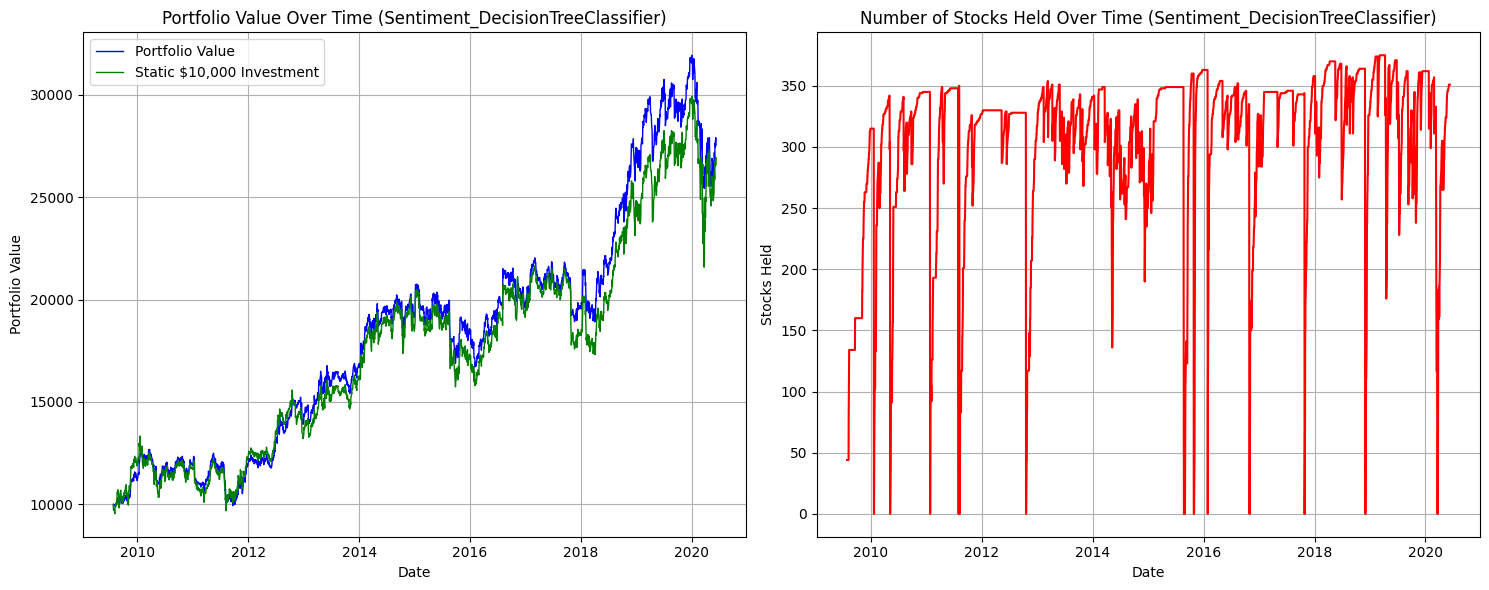

Model: Sentiment_finbert
ROI: 0.8070039753999984
Sharpe Ratio: 0.031431362565327914
Stock Price Change: 165.74586282671112
Portfolio Value Change: 80.70039753999984
Price vs Portfolio: -85.04546528671128


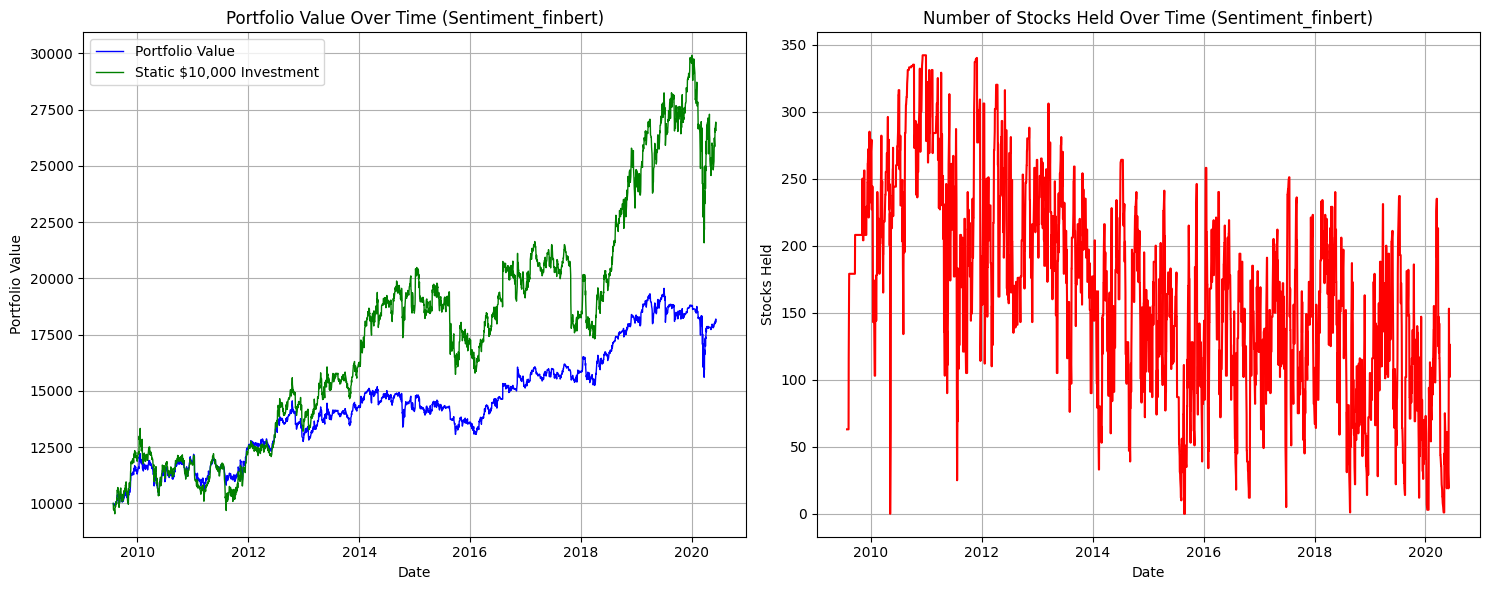

Model: Sentiment_LogisticRegression
ROI: 0.7744217993999996
Sharpe Ratio: 0.026586807640309452
Stock Price Change: 165.74586282671112
Portfolio Value Change: 77.44217993999996
Price vs Portfolio: -88.30368288671116


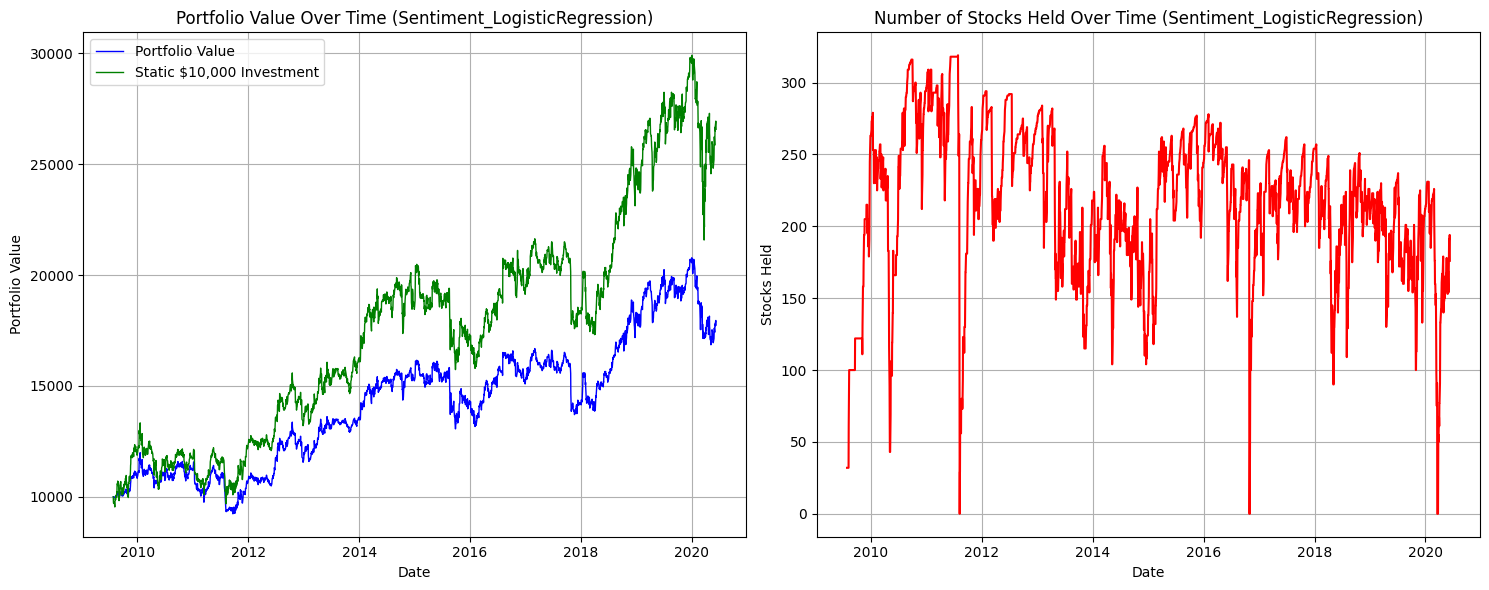

Model: Sentiment_KNeighborsClassifier
ROI: 0.7690171977999988
Sharpe Ratio: 0.025197274685968066
Stock Price Change: 165.74586282671112
Portfolio Value Change: 76.90171977999988
Price vs Portfolio: -88.84414304671124


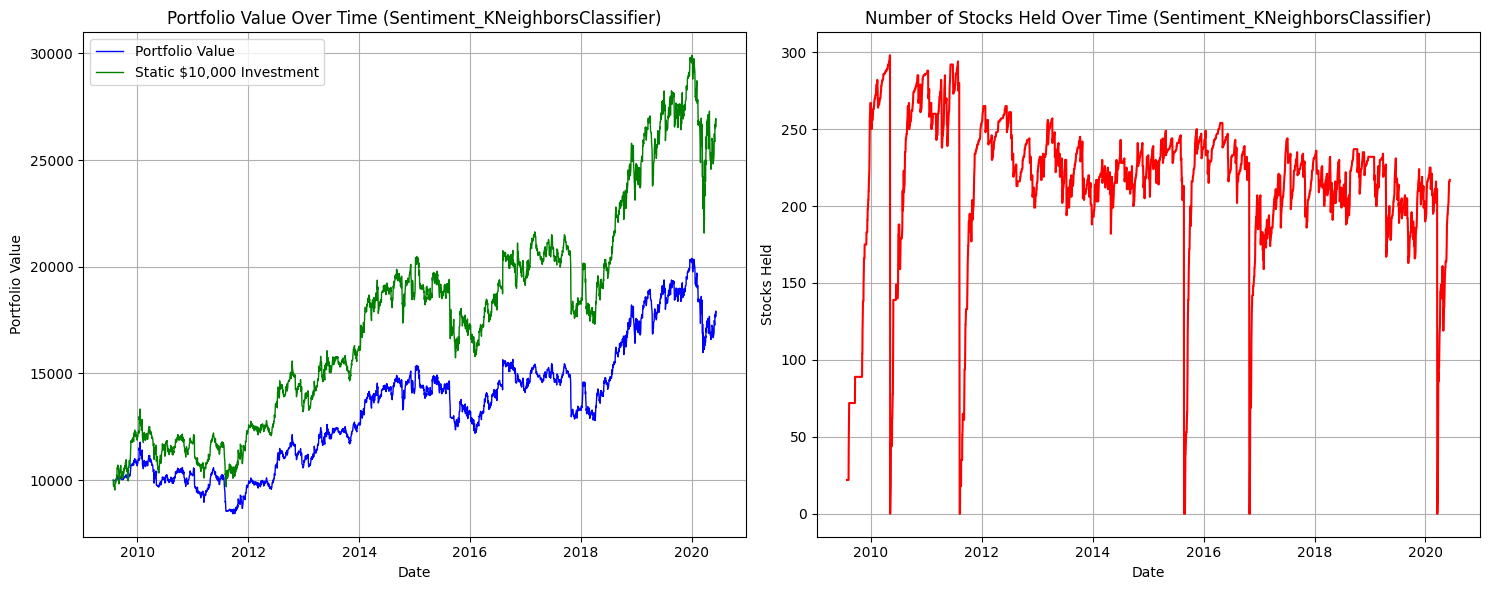

Model: Sentiment_MultinomialNB
ROI: 0.5295705931000013
Sharpe Ratio: 0.023160980647949723
Stock Price Change: 165.74586282671112
Portfolio Value Change: 52.95705931000013
Price vs Portfolio: -112.78880351671098


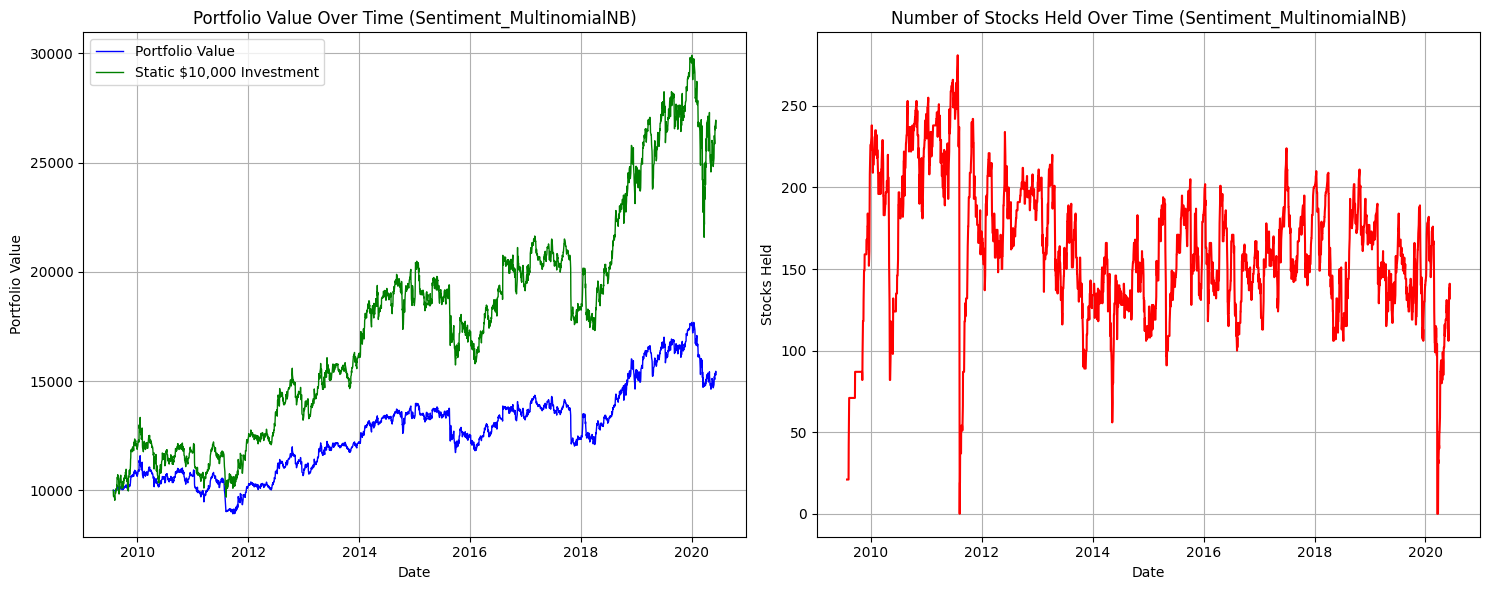

Model: Sentiment_SGDClassifier
ROI: 0.777528666999999
Sharpe Ratio: 0.028357102665301826
Stock Price Change: 165.74586282671112
Portfolio Value Change: 77.7528666999999
Price vs Portfolio: -87.99299612671122


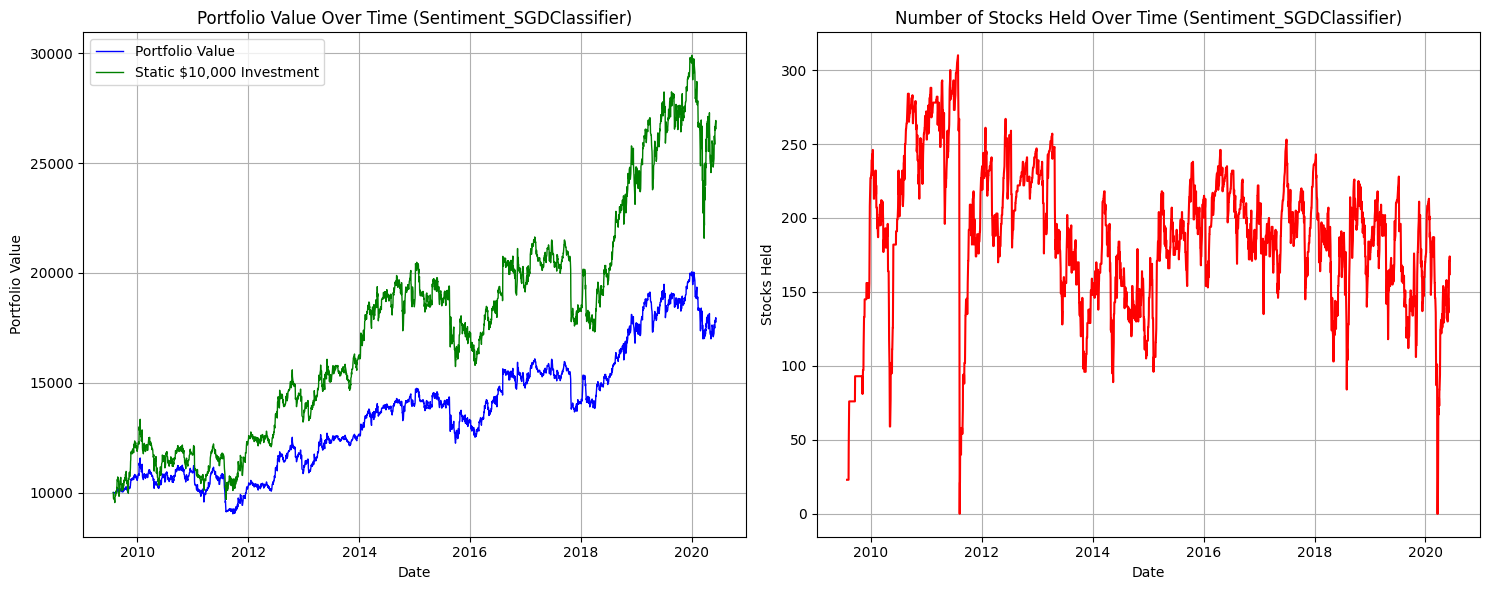

Model: Sentiment_GradientBoostingClassifier
ROI: 1.4121100916000007
Sharpe Ratio: 0.035230924204417806
Stock Price Change: 165.74586282671112
Portfolio Value Change: 141.21100916000006
Price vs Portfolio: -24.534853666711058


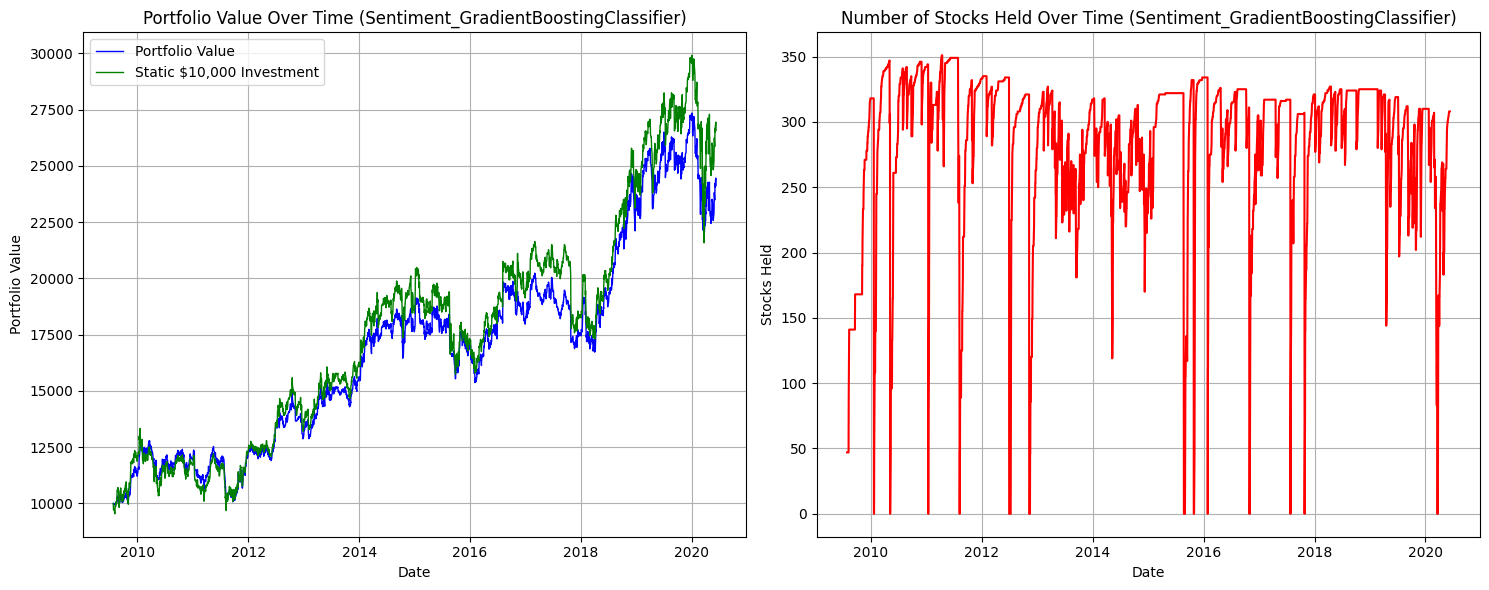

Model: Sentiment_XGBClassifier
ROI: 1.5942654270000003
Sharpe Ratio: 0.03851561907623546
Stock Price Change: 165.74586282671112
Portfolio Value Change: 159.42654270000003
Price vs Portfolio: -6.319320126711091


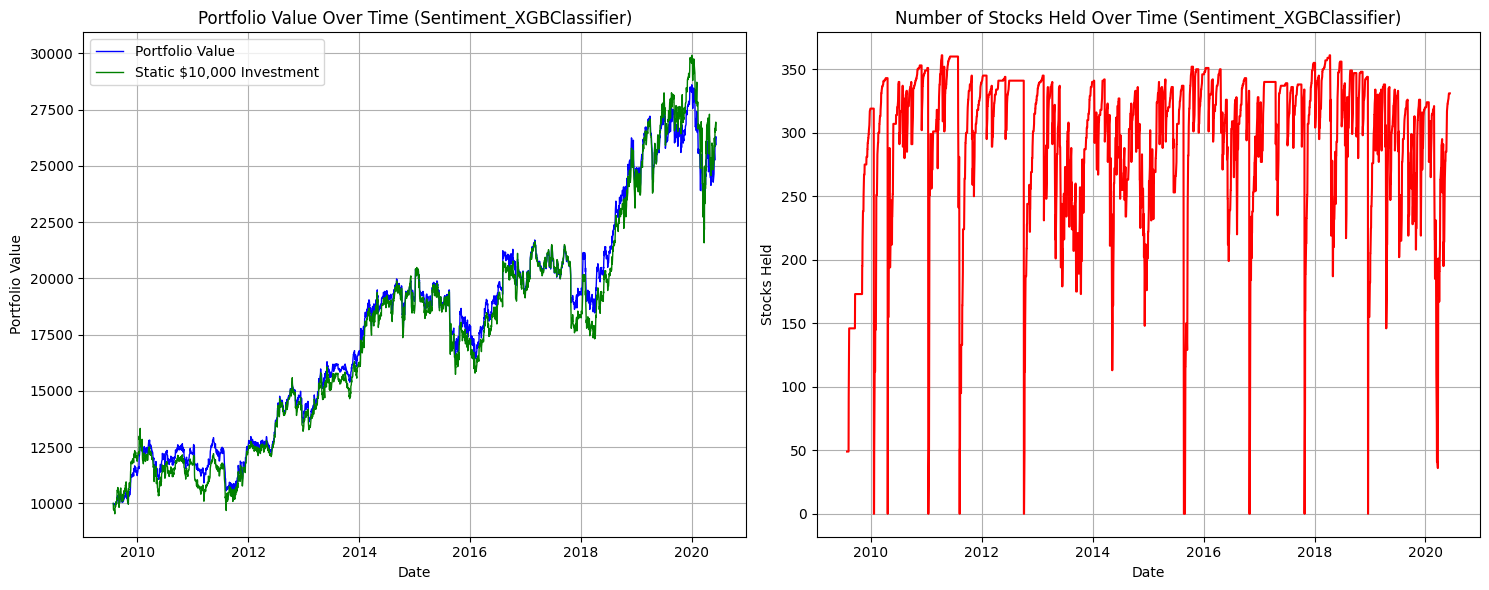

Model: Sentiment_RandomForestClassifier
ROI: 1.614595641800001
Sharpe Ratio: 0.038920791817423514
Stock Price Change: 165.74586282671112
Portfolio Value Change: 161.4595641800001
Price vs Portfolio: -4.286298646711032


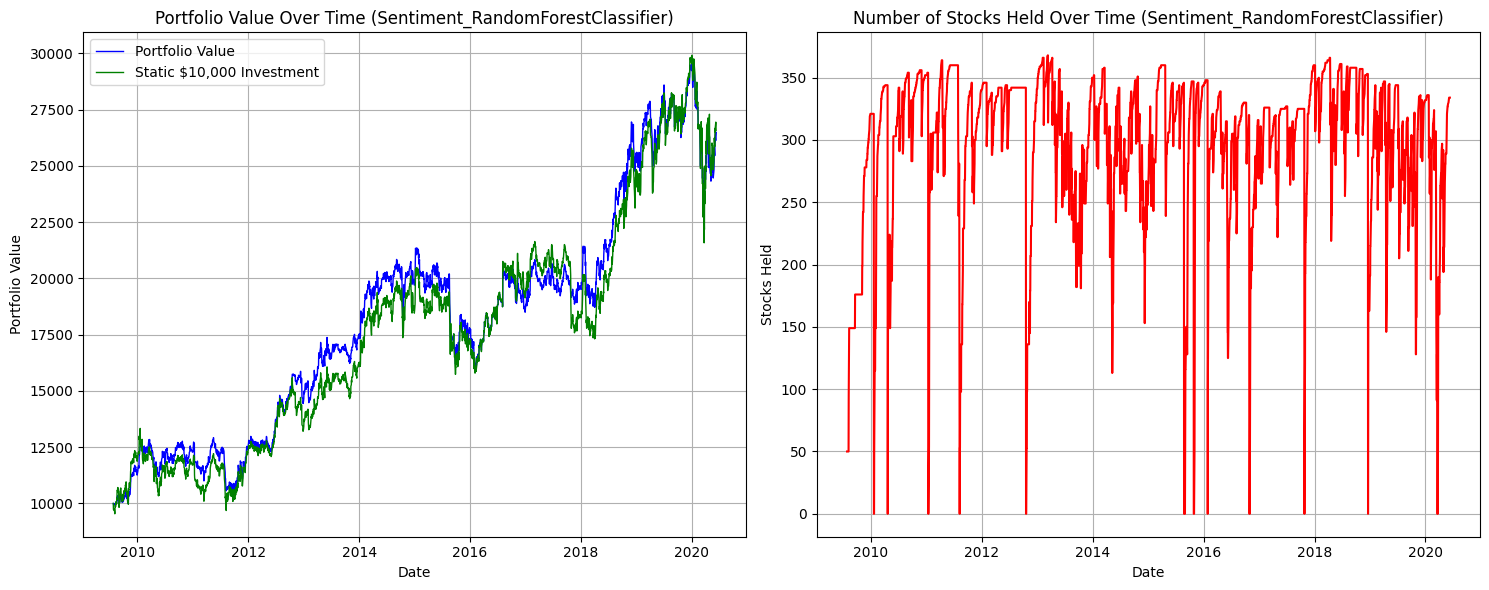

Model: Sentiment_Random
ROI: 0.7984933366000012
Sharpe Ratio: 0.03631816758391194
Stock Price Change: 165.74586282671112
Portfolio Value Change: 79.84933366000013
Price vs Portfolio: -85.89652916671099


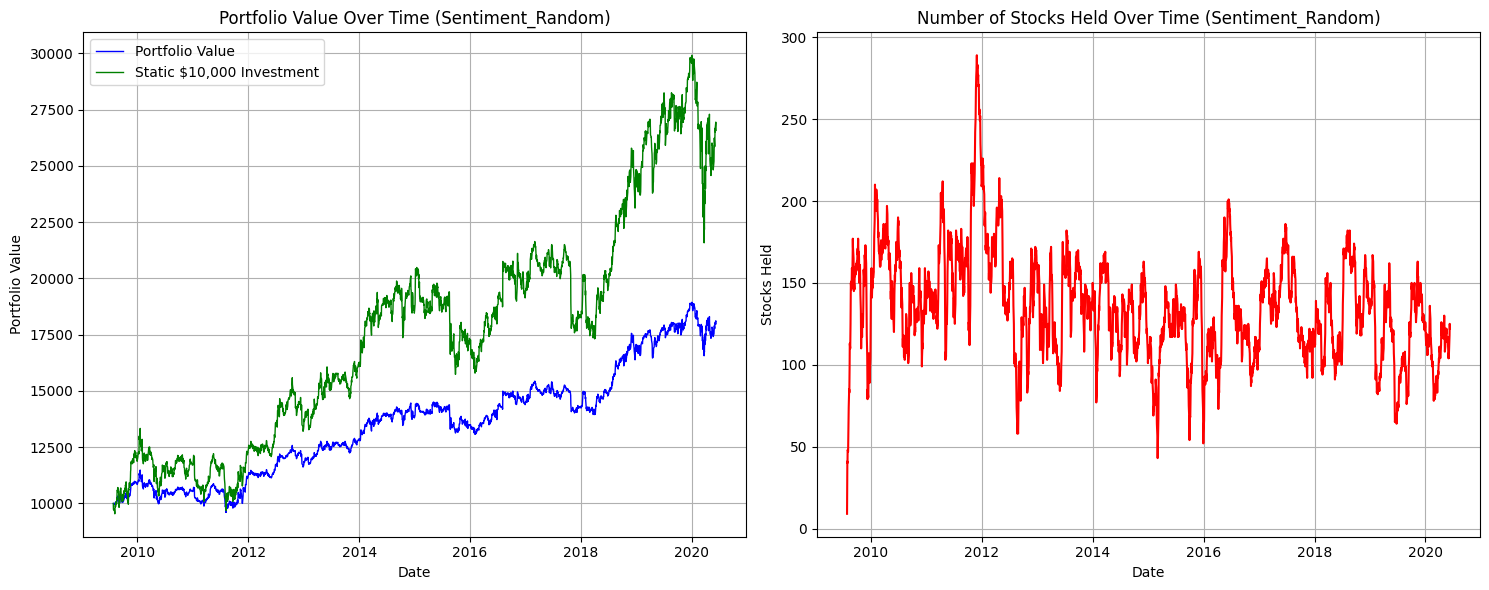

Model: Sentiment_ensemble
ROI: 1.5259477984999998
Sharpe Ratio: 0.03814752220039974
Stock Price Change: 165.74586282671112
Portfolio Value Change: 152.59477984999998
Price vs Portfolio: -13.151082976711137


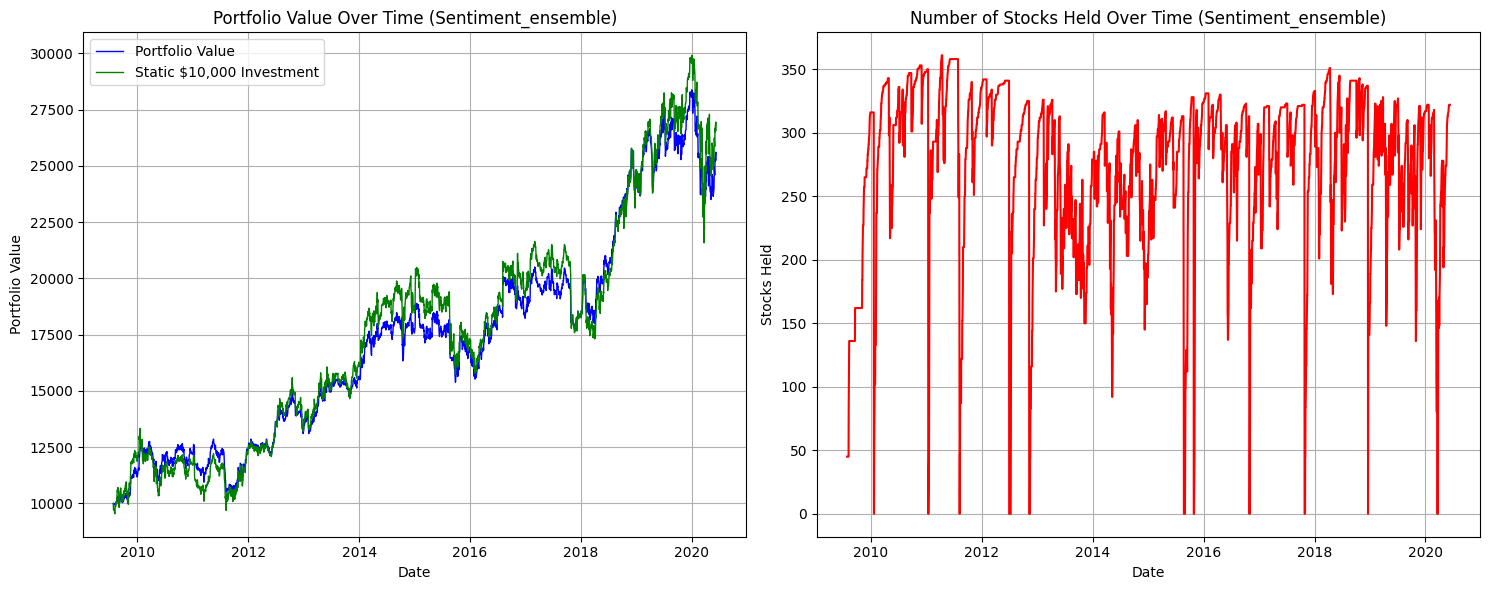

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

# Assuming 'merged_df' is your DataFrame

# Adjusting finbert sentiment to align with other models
# merged_df['Sentiment_finbert'] = merged_df['Sentiment_finbert'].replace({2: 1, 0: 1, 1: 0})

# Define action percent
action_percent = 0.5  # 10% of holdings

# List of sentiment columns
sentiment_cols = [col for col in merged_df.columns if 'Sentiment_' in col]

all_results = []

def calculate_position_size(sentiment, model_edge):
    base_size = 0.05  # Base position size (e.g., 5% of portfolio)
    scaling_factor = 2  # Determines how aggressively the position size scales with edge
    position_size = base_size + (model_edge - 0.5) * scaling_factor
    return max(min(position_size, 1), 0)  # Ensure the size is between 0 and 1

def execute_buy_order(stocks_to_buy, current_price, cash, stock, stop_loss_percentage, take_profit_percentage):
    stop_loss = None
    take_profit = None
    cost = stocks_to_buy * current_price
    if cost <= cash:
        cash -= cost
        stock += stocks_to_buy

        # Setting stop-loss and take-profit levels
        stop_loss = current_price * (1 - stop_loss_percentage)
        take_profit = current_price * (1 + take_profit_percentage)

    return cash, stock, stop_loss, take_profit

def execute_sell_order(stocks_to_sell, current_price, cash, stock):
    revenue = stocks_to_sell * current_price
    cash += revenue
    stock -= stocks_to_sell

    return cash, stock

consecutive_positive = 0
consecutive_negative = 0

stop_loss_percentage = 0.05  # 5% below the purchase price
take_profit_percentage = 0.10  # 10% above the purchase price

stock_name = stock

static_investment = [10000 * (row['Close'] / merged_df['Close'].iloc[0]) for index, row in merged_df.iterrows()]
# Loop through each sentiment model
for sentiment_col in sentiment_cols:
    initial_capital = 10000  # Starting capital
    cash = initial_capital
    stock = 0
    pnl = []
    no_trade = []
    stocks_held = []  # To track the number of stocks held over time

    stop_loss, take_profit = None, None
    
    consecutive_positive = 0
    consecutive_negative = 0

    for index, row in merged_df.iterrows():
        current_price = row['Close']
        sentiment = row[sentiment_col]
        position_size = calculate_position_size(sentiment, edge.loc[sentiment_col, 'Edge'])
        
        # Increase position size based on consecutive sentiments
        if sentiment > 0.5:  # Positive sentiment
            consecutive_positive += 1
            consecutive_negative = 0
            position_multiplier = 1 + (consecutive_positive - 1) * action_percent
        elif sentiment < 0.5:  # Negative sentiment
            consecutive_negative += 1
            consecutive_positive = 0
            position_multiplier = 1 + (consecutive_negative - 1) * action_percent
        else:  # Neutral sentiment
            consecutive_positive = 0
            consecutive_negative = 0
            position_multiplier = 1

        # Sell if negative sentiment is detected and we hold stock
        if sentiment < 0.5 and stock > 0:
            stocks_to_sell = int(stock * position_size * position_multiplier)
            cash, stock = execute_sell_order(stocks_to_sell, current_price, cash, stock)
            stop_loss, take_profit = None, None  # Resetting stop-loss and take-profit after selling

        # Buy if positive sentiment is detected
        elif sentiment > 0.5:
            stocks_to_buy = int((cash * position_size * position_multiplier) / current_price)
            if stocks_to_buy > 0:
                cash, stock, stop_loss, take_profit = execute_buy_order(stocks_to_buy, current_price, cash, stock, stop_loss_percentage, take_profit_percentage)

        # Check if stop-loss or take-profit conditions are met and we hold stock
        if stock > 0 and stop_loss is not None and take_profit is not None:
            if current_price <= stop_loss or current_price >= take_profit:
                cash, stock = execute_sell_order(stock, current_price, cash, stock)
                stop_loss, take_profit = None, None  # Resetting stop-loss and take-profit after selling





        portfolio_value = cash + stock * row['Close']
        no_trade.append(10000*row['Close'])
        pnl.append(portfolio_value)
        stocks_held.append(stock)  # Keep track of stocks held

    # Convert PnL and Stocks Held to a DataFrame
    pnl_df = pd.DataFrame({
        'Date': merged_df['Date'], 
        'Portfolio Value': pnl, 
        'Stocks Held': stocks_held,
        'Static Investment': static_investment  # Add static investment values
    })

    # Calculate performance metrics
    final_portfolio_value = pnl[-1]
    roi = (final_portfolio_value - initial_capital) / initial_capital
    pnl_returns = np.diff(pnl) / pnl[:-1]
    sharpe_ratio = np.mean(pnl_returns) / np.std(pnl_returns) if np.std(pnl_returns) != 0 else 0
    # Percentage increase in stock price from start to end
    stock_price_change = (merged_df['Close'].iloc[-1] - merged_df['Close'].iloc[0]) / merged_df['Close'].iloc[0] * 100
    # Percentage increase in portfolio value from start to end
    portfolio_value_change = (final_portfolio_value - initial_capital) / initial_capital * 100
    # Stock price change vs portfolio value change
    price_vs_portfolio = portfolio_value_change - stock_price_change
    


    # Print performance metrics for the current model
    print(f"Model: {sentiment_col}")
    print("ROI:", roi)
    print("Sharpe Ratio:", sharpe_ratio)
    print("Stock Price Change:", stock_price_change)
    print("Portfolio Value Change:", portfolio_value_change)
    print("Price vs Portfolio:", price_vs_portfolio)
    
    # Append the results to the list
    all_results.append([sentiment_col, roi, sharpe_ratio, stock_price_change, portfolio_value_change, price_vs_portfolio])

    # Plotting the graphs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)

    # Plot for Portfolio Value
    ax1.plot(pnl_df['Date'], pnl_df['Portfolio Value'], color='b', label='Portfolio Value', linewidth=1)
    ax1.plot(pnl_df['Date'], pnl_df['Static Investment'], color='g', label='Static $10,000 Investment', linewidth=1)  # Plot static investment
    ax1.set_title(f'Portfolio Value Over Time ({sentiment_col})')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Portfolio Value')
    ax1.legend()  # Add legend to distinguish the lines
    ax1.grid(True)

    # Plot for Stocks Held
    ax2.plot(pnl_df['Date'], pnl_df['Stocks Held'], linestyle='-', color='r')
    ax2.set_title(f'Number of Stocks Held Over Time ({sentiment_col})')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Stocks Held')
    ax2.grid(True)
    
    plt.savefig(f'results/{stock_name}/{sentiment_col}.png', dpi=300)
    
    plt.show()


# Remove the 'Sentiment_finbert1' column
# merged_df = merged_df.drop(columns=['Sentiment_finbert1'])

In [ ]:
# Convert the results to a DataFrame
results_df = pd.DataFrame(all_results, columns=['Model', 'ROI', 'Sharpe Ratio', 'Stock Price Change', 'Portfolio Value Change', 'Price vs Portfolio'])

# Sort the DataFrame by ROI in descending order
results_df = results_df.sort_values(by='ROI', ascending=False)

results_df.to_csv(f'results/{stock_name}/{stock_name}_trading_results.csv', index=False)

# Display the DataFrame
results_df

,Model,ROI,Sharpe Ratio,Stock Price Change,Portfolio Value Change,Price vs Portfolio
0,Sentiment_DecisionTreeClassifier,1.752423,0.039617,165.745863,175.242300,9.496437
8,Sentiment_RandomForestClassifier,1.614596,0.038921,165.745863,161.459564,-4.286299
7,Sentiment_XGBClassifier,1.594265,0.038516,165.745863,159.426543,-6.319320
10,Sentiment_ensemble,1.525948,0.038148,165.745863,152.594780,-13.151083
6,Sentiment_GradientBoostingClassifier,1.412110,0.035231,165.745863,141.211009,-24.534854
1,Sentiment_finbert,0.807004,0.031431,165.745863,80.700398,-85.045465
9,Sentiment_Random,0.798493,0.036318,165.745863,79.849334,-85.896529
5,Sentiment_SGDClassifier,0.777529,0.028357,165.745863,77.752867,-87.992996
2,Sentiment_LogisticRegression,0.774422,0.026587,165.745863,77.442180,-88.303683
3,Sentiment_KNeighborsClassifier,0.769017,0.025197,165.745863,76.901720,-88.844143


In [ ]:
# remove 'Sentiment_' from the model names in the edge DataFrame
edge = edge.rename(index=lambda x: x.replace('Sentiment_', ''))

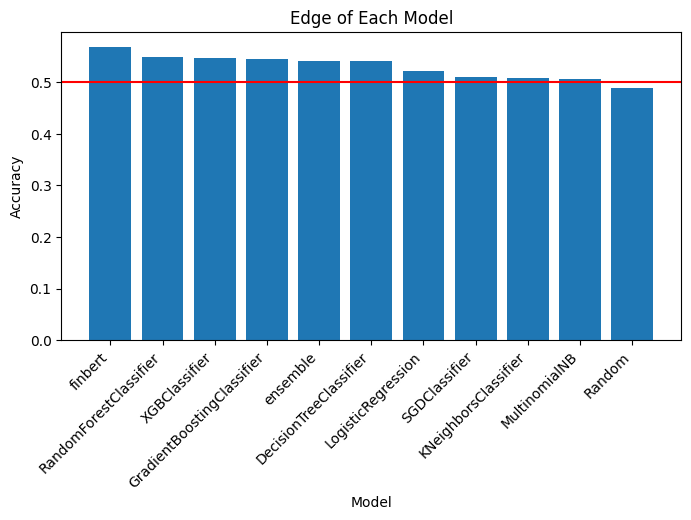

In [ ]:
# Graph the accuracies
plt.figure(figsize=(8, 4))
plt.bar(edge.index, edge['Edge'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Edge of Each Model')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.axhline(y=0.5, color='r', linestyle='-')  # Add horizontal line at y=0.5

plt.savefig(f'results/{stock_name}/edge_{stock_name}.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
edge

,Edge
finbert,0.568883
RandomForestClassifier,0.549692
XGBClassifier,0.547635
GradientBoostingClassifier,0.544894
ensemble,0.541467
DecisionTreeClassifier,0.540781
LogisticRegression,0.522276
SGDClassifier,0.509938
KNeighborsClassifier,0.507882
MultinomialNB,0.507197
